In [1]:
import zipfile
import os


zip_path = "/content/student.zip"
extract_to = "/content/unzipped/"


os.makedirs(extract_to, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Unzipped to: {extract_to}")


Unzipped to: /content/unzipped/


In [2]:
import os
print(os.listdir(extract_to))


['StudentsPerformance.csv']


In [10]:
import pandas as pd


csv_path = '/content/unzipped/StudentsPerformance.csv'
df = pd.read_csv(csv_path)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df.dropna(inplace=True)

# 3. One-hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# 4. Normalize Numerical Features
scaler = StandardScaler()
df_encoded[['reading score', 'writing score']] = scaler.fit_transform(df_encoded[['reading score', 'writing score']])


X = df_encoded.drop(columns=['math score'])
y = df_encoded['math score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)






Multilinear Regression Evaluation Metrics:
RMSE: 5.393993869732844
MAE: 4.214763142474851
R² Score: 0.8804332983749564


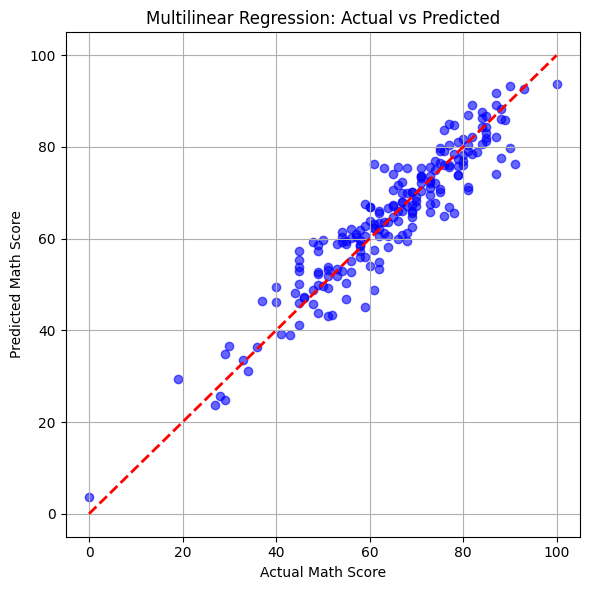


Polynomial Regression (Degree 2) Evaluation Metrics:
RMSE: 5.7271119948354805
MAE: 4.543567379112369
R² Score: 0.8652090594768913


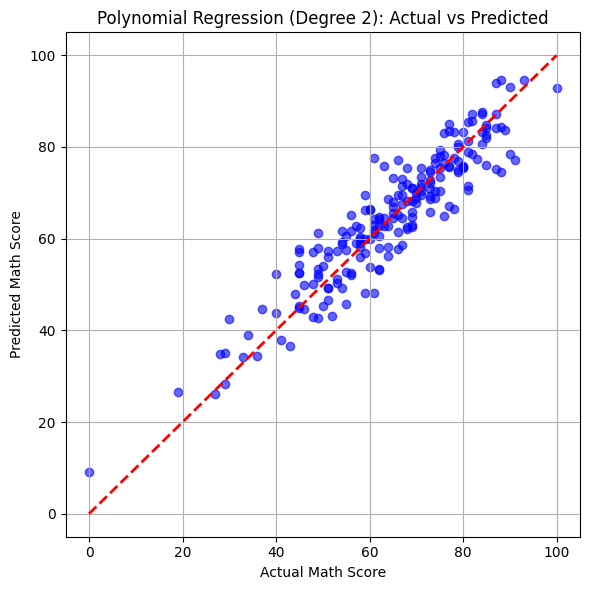

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



# --- Multilinear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# --- Polynomial Regression (degree=2) ---
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)

#Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation Metrics:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))


    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, color='blue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', linewidth=2)
    plt.xlabel("Actual Math Score")
    plt.ylabel("Predicted Math Score")
    plt.title(f"{name}: Actual vs Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Evaluate Models ---
evaluate_model("Multilinear Regression", y_test, y_pred_linear)
evaluate_model("Polynomial Regression (Degree 2)", y_test, y_pred_poly)


⚠️ Underfitting in Polynomial Regression
Underfitting occurs when a model is too simple to capture the underlying patterns in the data. In the context of polynomial regression, this typically happens when the degree of the polynomial is too low (e.g., using a linear model when the true relationship is curved or more complex). An underfitted model will have high training and testing errors, and its predictions will not accurately reflect the trends in the data. For example, in the students’ performance dataset, if we try to predict math scores using only a linear relationship while the actual pattern is more complex, the model may fail to capture critical interactions between features like reading and writing scores.

🚨 Overfitting in Polynomial Regression
Overfitting arises when a model is too complex and learns not just the general pattern but also the noise in the training data. In polynomial regression, using a high-degree polynomial (e.g., degree 4 or higher) can lead to overfitting. The model may perform extremely well on the training data, showing a very low error, but fail to generalize to new, unseen data. This results in low training error but high test error, and a significant drop in the R² score when evaluated on the test set. In our case, if a degree-2 polynomial model shows a strong performance gap between training and testing metrics, it may indicate mild overfitting.

📊 How to Detect Overfitting or Underfitting
The easiest way to detect overfitting or underfitting is by comparing the model’s performance on training vs. testing datasets using metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² score. If both training and test errors are high, the model is likely underfitting. If the training error is low but the test error is high, it is likely overfitting. A well-balanced model should have similar performance across both sets. Visualization of actual vs. predicted values can also help highlight these issues.

